# Machine Learning Lab 2

## Assignment 2 (Deadline : 29/01/2023 11:59PM)

Total Points : 25

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Q1.

Semantic image segmentation is a task in computer vision where the goal is to assign a class label to each pixel in an image. The goal of semantic segmentation is to classify each pixel in an image to its corresponding class. It's different from instance segmentation, where the goal is to detect and segment individual objects within an image.

For example, in an image containing a person, a car, and a building, semantic segmentation would classify each pixel as belonging to one of these classes: person, car, building, background, etc. This task is challenging because it requires the model to not only identify the object in the image but also understand its shape and boundaries.

Semantic image segmentation is a fundamental task in computer vision and is used in a wide range of applications such as object detection, scene understanding, self-driving cars, and medical imaging.

The goal of this assignment is to train a deep learning model to perform semantic image segmentation on the COCO dataset. The COCO dataset consists of 80 object categories and a total of 330,000 images. The task is to predict a class label for every pixel in an image. `

*   Start by downloading the COCO dataset from the official website and split it into train, validation, and test sets. **(2 points)**

*   Preprocess the data by converting the images to grayscale and normalizing the pixel values. **(5 points)**

*   Build a deep learning model using a convolutional neural network (CNN) architecture. You can use a pre-trained model such as ResNet or VGG as a starting point. **(8 points)**


*   Use an encoder-decoder architecture with skip connections to improve the segmentation performance. **(2 points)**

*   Use a combination of different loss functions to optimize the model. **(2 points)**

*   **Bonus** : Use techniques such as data augmentation and transfer learning to improve the performance of the model. **(0 points)**

*   **Bonus** : Use techniques such as non-maximum suppression to post-process the output of the model and improve the final segmentation results. **(0 points)**

*   Evaluate the performance of the model on the validation and test sets using metrics such as Intersection over Union (IoU) and mean pixel accuracy. Plot graphs wherever necessary **(3 points)**


*   Write a report describing the model architecture, training process, evaluation results, and discussion of the results. **(3 points)**



The aim of the assignment is to get you familiarised with CNNs and the practices followd in industry. While SOTA could be the eventual dream, doing so now might come at the expense of exhausting your premium GPU. Also, succesfully attempting the bonus sections will help with a grade boost if you falter in any other sections. The code should have proper headers and comments for all sections with points.

## Installing libraries

In [ ]:
!pip install fiftyone;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.0/564.0 KB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

# Libraries

In [ ]:

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn

import torchvision
from torchvision.transforms import functional as F2
from torchvision import models

# to ensure reproducibility
torch.manual_seed(1)

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import skimage.io as io

import fiftyone.zoo as foz
import fiftyone as fo
from fiftyone import ViewField as F
import fiftyone.utils.coco as fouc

from tqdm import tqdm

import numpy as np

import albumentations as A

Migrating database to v0.18.0


INFO:fiftyone.migrations.runner:Migrating database to v0.18.0


# Downloading data

In [ ]:
labels_list = ['person', 'chair', 'car', 'dining table', 'cup', 'bottle', 'bowl', 'handbag', 'truck', 'bench', 'backpack', 'book', 
               'cell phone', 'sink', 'clock', 'tv', 'potted plant', 'couch', 'dog', 'knife', 'sports ball', 'traffic light', 'cat', 'umbrella', 'bus']

In [ ]:
# train_set = foz.load_zoo_dataset("coco-2017", split = "train", label_types = ["detections", "segmentations"])
# test_set = foz.load_zoo_dataset("coco-2017", split = "test", label_types = ["detections", "segmentations"])
validation_set = foz.load_zoo_dataset("coco-2017", split = "validation", label_types = ["detections", "segmentations"])

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [37.9s elapsed, 0s remaining, 93.4Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [37.9s elapsed, 0s remaining, 93.4Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading images to '/root/fiftyone/coco-2017/tmp-download/val2017.zip'


 100% |██████|    6.1Gb/6.1Gb [1.4m elapsed, 0s remaining, 91.9Mb/s]      


INFO:eta.core.utils: 100% |██████|    6.1Gb/6.1Gb [1.4m elapsed, 0s remaining, 91.9Mb/s]      


Extracting images to '/root/fiftyone/coco-2017/validation/data'


INFO:fiftyone.utils.coco:Extracting images to '/root/fiftyone/coco-2017/validation/data'


Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 5000/5000 [1.6m elapsed, 0s remaining, 47.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 5000/5000 [1.6m elapsed, 0s remaining, 47.0 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


# Data prepration

In [ ]:
# Labels that we will work with

labels_list = ['person', 'chair', 'car', 'dining table', 'cup', 'bottle', 'bowl', 'handbag', 'truck', 'bench', 'backpack', 'book', 
               'cell phone', 'sink', 'clock', 'tv', 'potted plant', 'couch', 'dog', 'knife', 'sports ball', 'traffic light', 'cat', 'umbrella', 'bus']

# Creating a mapping
labels_map = {k : i+1 for i, k in enumerate(labels_list)}

print("The mapping of the labels to an index: ")
labels_map

The mapping of the labels to an index: 


{'person': 1,
 'chair': 2,
 'car': 3,
 'dining table': 4,
 'cup': 5,
 'bottle': 6,
 'bowl': 7,
 'handbag': 8,
 'truck': 9,
 'bench': 10,
 'backpack': 11,
 'book': 12,
 'cell phone': 13,
 'sink': 14,
 'clock': 15,
 'tv': 16,
 'potted plant': 17,
 'couch': 18,
 'dog': 19,
 'knife': 20,
 'sports ball': 21,
 'traffic light': 22,
 'cat': 23,
 'umbrella': 24,
 'bus': 25}

In [ ]:
# filtering the data with labels

filtered_val = validation_set.filter_labels("segmentations",
                                            F("label").is_in(labels_list))

# filtered_train = train_set.filter_labels("segmentations",
#                                             F("label").is_in(labels_list))

print(f"The length of the validationdata: {len(filtered_val)}")

The length of the validationdata: 4027


In [ ]:
# testdata = filtered_train.take(50000, seed=51)
# traindata = filtered_train.exclude([s.id for s in testdata])

In [ ]:
# print(len(traindata))

45037


In [ ]:
# filteredtrain = filtered_train.take(60000)
# print(f"The length of the traindata: {len(filteredtrain)}")

In [ ]:
testdata = filtered_val.take(500, seed=51)
traindata = filtered_val.exclude([s.id for s in testdata])

# Visualising a pair of image and mask

In [ ]:
# picking a pair
to_view = filtered_val.take(1).first()

frame_size = (256, 256)
masks_res = []

# creating a seprate mask for every class that we are trying to classify
for i in range(len((labels_map))):
  masks_res.append(np.zeros(frame_size))

for i, j in enumerate(to_view["segmentations"]["detections"]):
  label = j.label
  maskings = j.to_segmentation(frame_size = frame_size, target = 1).mask
  mask = np.zeros(frame_size)
  mask = np.maximum(maskings*1, mask)
  idx = labels_map[label]
  masks_res[idx-1] += mask

# To stack the masks of different classes onto one
fin_mask = np.where(np.stack(masks_res, axis = 0)==0, 0, 1)
print(f"Shape of the stacked mask: {fin_mask.shape}")

Shape of the stacked mask: (25, 256, 256)


In [ ]:
for i, arr in enumerate(fin_mask):
  fin_mask[i] = arr*(i+1)

In [ ]:
maskfinal = np.max(fin_mask, axis = 0)

Shape of the image: (256, 256)


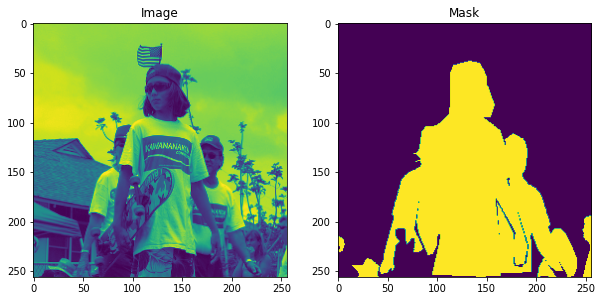

In [ ]:
image_path = to_view["filepath"]
image = io.imread(image_path, as_gray = True) / 255.0

image = cv2.resize(image, frame_size)
print(f"Shape of the image: {image.shape}")

# visualisation
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.set_title('Image')
ax1.imshow(image)

ax2.set_title('Mask')
ax2.imshow(maskfinal);

# Converting fiftyone dataset to tensors

In [ ]:
global IMAGE_SIZE
IMAGE_SIZE = 256
frame_size = (256, 256)

class SegmentationDataset(Dataset):

  def __init__(self, fiftyone_dataset, labels):

    self.samples = fiftyone_dataset
    self.img_paths = self.samples.values("filepath")
    self.labels = labels
  
  def __getitem__(self, idx):

    image_path = self.img_paths[idx]
    sample = self.samples[image_path]
    image = io.imread(image_path, as_gray = True) / 255.0 # converting to grayscale and normalising them
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))  # Resizing the image
    image = np.expand_dims(image, axis=1)
    image = np.transpose(image, (1,0,2)).astype(np.float32)

    # creating masks
    masks_res = []

    for i in range(len(self.labels)):
      masks_res.append(np.zeros((IMAGE_SIZE, IMAGE_SIZE)))

    for i, j in enumerate(sample["segmentations"]["detections"]):
      label = j.label
      maskings = j.to_segmentation(frame_size = frame_size, target = 1).mask
      mask = np.zeros(frame_size)
      mask = np.maximum(maskings*1, mask)
      idx = labels_map[label]
      masks_res[idx-1] += mask
    
    fin_masks = np.where(np.stack(masks_res, axis=0) == 0, 0, 1)

    image = torch.Tensor(image)
    fin_mask = torch.Tensor(fin_masks)

    return image, fin_mask
  
  def __len__(self):
    return len(self.img_paths)

In [ ]:
# validationset =  SegmentationDataset(filtered_val, labels_map)
# trainset = SegmentationDataset(traindata, labels_map)
# train_set = SegmentationDataset(filtered_train, labels_map)

In [ ]:
# del train_set

In [ ]:
trainset = SegmentationDataset(traindata, labels_map)
testset = SegmentationDataset(testdata, labels_map)

# Visualisation helper!

In [ ]:
# helper function to visualise the final output
# --- work needed here

def show_image(image,mask,pred_image = None):
    
    if pred_image.any() == None:
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze())
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask)
        
    else:
        
        f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))
        
        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze())
        
        ax2.set_title('GROUND TRUTH')
        ax2.imshow(mask)
        
        ax3.set_title('MODEL OUTPUT')
        ax3.imshow(pred_image)

[ 0.  1.  6. 15.]


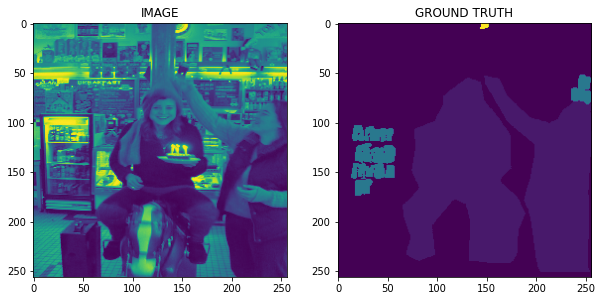

In [ ]:
index = np.random.randint(0, len(trainset))

# image, mask = validationset[index]

image, mask = trainset[index] 

mask = mask.numpy()

for i, arr in enumerate(mask):
  mask[i] = arr*(i+1)

maskfinal = np.max(mask, axis = 0)
print(np.unique(maskfinal))
show_image(image, maskfinal)

# Loading dataset into batches

In [ ]:
BATCH_SIZE = 16
# trainloader = DataLoader(trainset, batch_size= BATCH_SIZE, shuffle = True)
# validloader = DataLoader(validationset, batch_size= BATCH_SIZE, shuffle = True)
trainloader = DataLoader(trainset, batch_size= BATCH_SIZE, shuffle = True)
testloader = DataLoader(testset, batch_size= BATCH_SIZE, shuffle = True) 

In [ ]:
# Checking the final sizes of the images and masks before passing it into the models

for image, mask in trainloader:
  break

print(f"in 1 batch, shape of a image is {image.shape}")
print(f"in 1 batch, shape of a mask is {mask.shape}")

in 1 batch, shape of a image is torch.Size([16, 1, 256, 256])
in 1 batch, shape of a mask is torch.Size([16, 25, 256, 256])


# Models

In [ ]:
!pip install segmentation_models_pytorch;
from segmentation_models_pytorch.losses import DiceLoss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=42f7c21ca6324fbc8837e1a594ddf798614ad96ded955a35e0b72dfe3300dcf7
  Stored in directory: /root/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=bf911ed48089ba6a51d5fc67aea7caaa06403ff2940347c32b15fd76b2e55ce6
  Stored in directory: /root/.cache/pip/w

In [ ]:
# Defining the deep resnet model

class batchnorm_relu(nn.Module):
    def __init__(self, in_c):
        super().__init__()

        self.bn = nn.BatchNorm2d(in_c)
        self.relu = nn.ReLU()

    def forward(self, inputs):
        x = self.bn(inputs)
        x = self.relu(x)
        return x

class residual_block(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()

        """ Convolutional layer """
        self.b1 = batchnorm_relu(in_c)
        self.c1 = nn.Conv2d(in_c, out_c, kernel_size=3, padding=1, stride=stride)
        self.b2 = batchnorm_relu(out_c)
        self.c2 = nn.Conv2d(out_c, out_c, kernel_size=3, padding=1, stride=1)

        """ Shortcut Connection (Identity Mapping) """
        self.s = nn.Conv2d(in_c, out_c, kernel_size=1, padding=0, stride=stride)

    def forward(self, inputs):
        x = self.b1(inputs)
        x = self.c1(x)
        x = self.b2(x)
        x = self.c2(x)
        s = self.s(inputs)

        return s

        skip = x + s
        return skip

class decoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.upsample = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.r = residual_block(in_c+out_c, out_c)

    def forward(self, inputs, skip):
        x = self.upsample(inputs)
        x = torch.cat([x, skip], axis=1)
        x = self.r(x)
        return x

class build_resunet(nn.Module):
    def __init__(self):
        super().__init__()

        """ Encoder 1 """
        self.c11 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.br1 = batchnorm_relu(64)
        self.c12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.c13 = nn.Conv2d(1, 64, kernel_size=1, padding=0)

        """ Encoder 2 and 3 """
        self.r2 = residual_block(64, 128, stride=2)
        self.r3 = residual_block(128, 256, stride=2)

        """ Bridge """
        self.r4 = residual_block(256, 512, stride=2)

        """ Decoder """
        self.d1 = decoder_block(512, 256)
        self.d2 = decoder_block(256, 128)
        self.d3 = decoder_block(128, 64)

        """ Output """
        self.output = nn.Conv2d(64, 25, kernel_size=1, padding=0)
        self.sigmoid = nn.Sigmoid()

    def forward(self, image, mask):
        """ Encoder 1 """
        x = self.c11(image)
        x = self.br1(x)
        x = self.c12(x)
        s = self.c13(image)
        skip1 = x + s

        """ Encoder 2 and 3 """
        skip2 = self.r2(skip1)
        skip3 = self.r3(skip2)

        """ Bridge """
        b = self.r4(skip3)

        """ Decoder """
        d1 = self.d1(b, skip3)
        d2 = self.d2(d1, skip2)
        d3 = self.d3(d2, skip1)

        """ output """
        output = self.output(d3)

        if mask != None:
          loss = DiceLoss(mode = 'multilabel')(output, mask)
          return output, loss

        return output

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
# !pip install numba

# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

In [ ]:
LR = 0.0001
DEVICE = 'cuda'
model = build_resunet()
model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

In [ ]:
def train_fn(dataloader, model, optimizer):
  model.train()

  total_loss = 0.0

  for images, masks in tqdm(dataloader):

    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    optimizer.zero_grad()
    output, loss = model(images, masks)

    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  return total_loss / len(dataloader)

In [ ]:
def eval_fn(data_loader, model):

  model.eval()
  total_loss = 0.0

  with torch.no_grad():
    
    for images, masks in tqdm(data_loader):
      images = images.to(DEVICE)
      masks = masks.to(DEVICE)

      logits, loss = model(images, masks)

      total_loss += loss.item()
    
  return total_loss / len(data_loader)

In [ ]:
best_val_loss = np.Inf

for i in range(15):
  
  train_loss = train_fn(trainloader, model, optimizer)
  val_loss = eval_fn(testloader, model)

  if val_loss < best_val_loss:
    torch.save(model.state_dict(), 'best_model.pt')
    print("Saved Model")
    best_val_loss = val_loss    

  print(f"Epoch : {i+1} Train loss: {train_loss} Valid loss: {val_loss}")

100%|██████████| 32/32 [00:57<00:00,  1.81s/it]


Saved Model
Epoch : 1 Train loss: 0.6189561034489541 Valid loss: 0.6092278966680169


100%|██████████| 32/32 [00:58<00:00,  1.83s/it]


Epoch : 2 Train loss: 0.6282614830931926 Valid loss: 0.6160888485610485


100%|██████████| 32/32 [00:57<00:00,  1.81s/it]


Epoch : 3 Train loss: 0.6207276500458092 Valid loss: 0.6245648851618171


100%|██████████| 32/32 [00:57<00:00,  1.81s/it]


Saved Model
Epoch : 4 Train loss: 0.6262951324698073 Valid loss: 0.604999721981585


100%|██████████| 32/32 [00:57<00:00,  1.79s/it]


Saved Model
Epoch : 5 Train loss: 0.6216424702249501 Valid loss: 0.5952968820929527


100%|██████████| 32/32 [00:57<00:00,  1.78s/it]


Epoch : 6 Train loss: 0.6256875390380756 Valid loss: 0.6391691733151674


100%|██████████| 32/32 [00:57<00:00,  1.79s/it]


Epoch : 7 Train loss: 0.622819887499464 Valid loss: 0.6156918467022479


100%|██████████| 32/32 [00:56<00:00,  1.78s/it]


Epoch : 8 Train loss: 0.6163852355059456 Valid loss: 0.6178014883771539


100%|██████████| 32/32 [00:56<00:00,  1.77s/it]


Epoch : 9 Train loss: 0.626008306018907 Valid loss: 0.6197479655966163


100%|██████████| 32/32 [00:56<00:00,  1.78s/it]


Epoch : 10 Train loss: 0.6181601480121526 Valid loss: 0.6224619313143194


100%|██████████| 32/32 [00:57<00:00,  1.79s/it]


Epoch : 11 Train loss: 0.6213828553171719 Valid loss: 0.6059199627488852


100%|██████████| 32/32 [00:56<00:00,  1.78s/it]


Epoch : 12 Train loss: 0.6203400053050183 Valid loss: 0.6173306331038475


100%|██████████| 32/32 [00:56<00:00,  1.78s/it]


Epoch : 13 Train loss: 0.6178165952004998 Valid loss: 0.6212061466649175


100%|██████████| 32/32 [00:56<00:00,  1.78s/it]


Epoch : 14 Train loss: 0.6205507218837738 Valid loss: 0.6404801891185343


100%|██████████| 32/32 [00:56<00:00,  1.77s/it]

Epoch : 15 Train loss: 0.6145784609458026 Valid loss: 0.6349186608567834


In [ ]:
idx = 4

model.load_state_dict(torch.load('/content/best_model.pt'))

<All keys matched successfully>

In [ ]:
image, mask = testset[idx]

In [ ]:
mask = mask.numpy()

for i, arr in enumerate(mask):
  mask[i] = arr*(i+1)

maskfinal = np.max(mask, axis = 0)
print(np.unique(maskfinal))

[ 0.  1. 21.]


In [ ]:
model.eval()
logit_mask = model(image.to(DEVICE).unsqueeze(0), mask=None)
pred_mask = torch.sigmoid(logit_mask)

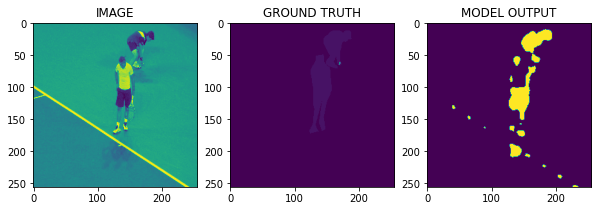

In [ ]:
pred_mask = pred_mask.detach().cpu().squeeze(0)
pred_mask = (pred_mask > 0.5)*1.0
pred_mask = pred_mask.numpy()

for i, arr in enumerate(pred_mask):

  pred_mask[i] = pred_mask[i]*(i+1)

pred_maskfinal = np.max(pred_mask, axis = 0)
show_image(image, maskfinal, pred_maskfinal)